In [1]:
import os, sys

import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import scipy.linalg as sla
import pandas as pd
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def ellipsoid_intersection_test(Ell_A, Ell_B, tau=1):
    
    Sigma_A, mu_A = Ell_A[4], Ell_A[0]
    Sigma_B, mu_B = Ell_B[4], Ell_B[0]
    
    lambdas, Phi, v_squared = ellipsoid_intersection_test_helper(Sigma_A, Sigma_B, mu_A, mu_B)
    res = minimize_scalar(ellipsoid_K_function,
                          bracket=[0.0, 0.5, 1.0],
                          args=(lambdas, v_squared, tau))
    return (res.fun[0] >= 0)


def ellipsoid_intersection_test_helper(Sigma_A, Sigma_B, mu_A, mu_B):
    lambdas, Phi = eigh(Sigma_A, b=Sigma_B)
    v_squared = np.dot(Phi.T, mu_A - mu_B) ** 2
    return lambdas, Phi, v_squared


def ellipsoid_K_function(ss, lambdas, v_squared, tau):
    ss = np.array(ss).reshape((-1,1))
    lambdas = np.array(lambdas).reshape((1,-1))
    v_squared = np.array(v_squared).reshape((1,-1))
    return 1.-(1./tau**2)*np.sum(v_squared*((ss*(1.-ss))/(1.+ss*(lambdas-1.))), axis=1)

In [3]:
def unit_vecort(angle):
    
    theta = angle * np.pi / 180.
    ux = np.cos(theta)
    uy = np.sin(theta)
    
    return (ux, uy)

def get_Sigma(Smajor, Sminor, angle):

    u1 = unit_vecort(angle)
    u2 = unit_vecort(angle-90)
    R = np.vstack((u1,u2))
    L = R.T
    X = np.diag((1./Smajor**2, 1./Sminor**2))
    A = np.matmul(np.matmul(L, X), R)

    return np.linalg.inv(A)

In [4]:
## This function allows to execute the OS commands
def xcmd(cmd, verbose=True):
    """Runs an OS command
    :param cmd: terminal command
    :type cmd: ``str``
    :param verbose: printing the details, default True 
    :type verbose: ``boolean``
    :return: OS outputs
    :rtype: ``str``
    """

    if verbose: print('\n'+cmd)

    tmp=os.popen(cmd)
    output=''
    for x in tmp: output+=x
    if 'abort' in output:
        failure=True
    else:
        failure=tmp.close()
    if False:
        print('execution of %s failed' % cmd)
        print('error is as follows', output)
        sys.exit()
    else:
        return output

##########################################################################

In [5]:
def make_Ellipse(center, Smajor, Sminor, angle):
    
    Sigma = get_Sigma(Smajor, Sminor, angle)
    return [np.asarray(center), Smajor, Sminor, angle, Sigma]

def plot_Ellipse(Ell, ax=None, **kwargs):
    
    if ax is None:
        ax = plt.gca()
    
    e = patches.Ellipse(Ell[0], width=2*Ell[1], height=2*Ell[2], angle=Ell[3], **kwargs)
    ax.add_patch(e)
    
    return ax

True

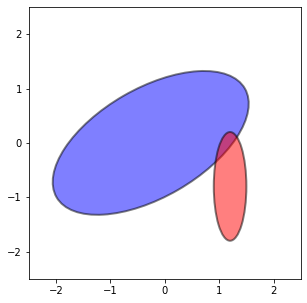

In [6]:
plt.figure(figsize=(5, 5))
plt.subplot(111)
ax = plt.gca()

plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])
plt.gca().set_aspect(1.0)


## Ellipse A
Smajor = 2
Sminor = 1
angle = 30
center = (-0.26, 0)
Ell_A = make_Ellipse(center, Smajor, Sminor, angle)

## Ellipse B
Smajor = 1
Sminor = 0.3
angle = 90
center = (1.2, -0.8)
Sigma = get_Sigma(Smajor, Sminor, angle)
Ell_B = make_Ellipse(center, Smajor, Sminor, angle)


plot_Ellipse(Ell_A, ax=ax, fill=True, alpha=0.5, linewidth=2, facecolor='b', edgecolor='k')
plot_Ellipse(Ell_B, ax=ax, fill=True, alpha=0.5, linewidth=2, facecolor='r', edgecolor='k')

ellipsoid_intersection_test(Ell_A, Ell_B)

In [140]:
def plot_E(df, ax=None, **kwargs):
    
    Smajor = df.Rmaj
    Sminor = Smajor*(1.-df.ellip)
    
    angle = df.alpha+90
    center = (df.x0, df.y0)
    Sigma = get_Sigma(Smajor, Sminor, angle)
    Ell = make_Ellipse(center, Smajor, Sminor, angle)

    if ax is None:
        ax = plt.gca()
        
    plot_Ellipse(Ell, ax=ax, **kwargs)
    
    return ax
    

In [141]:
monsta='/home/ehsan/Home/Monsta/bin/monsta'

In [142]:
name    = 'n0679'  # 'n0439'

In [143]:
with open('./catal.dat', 'r') as f:
    
    lines = f.readlines()
 
col_names = []
i = 0 
while lines[i].split()[0]=="#":
    col_names.append(lines[i].split()[2])   
    i+=1
    
# col_names

In [198]:
cmd = 'sex -c wfc3j_sex.config {}/{}j.fits -CATALOG_NAME catal.dat'.format(name,name)

print(cmd)

xcmd(cmd + ' > py_monsta.log', verbose=False)

df = pd.read_csv("./catal.dat", delimiter=r"\s+", skiprows=len(col_names), 
                 header = None, names = col_names[:17], usecols = range(17))

df.head()

sex -c wfc3j_sex.config n0679/n0679j.fits -CATALOG_NAME catal.dat


,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,A_IMAGE,B_IMAGE,FWHM_IMAGE,ELLIPTICITY,FLAGS,CLASS_STAR,CXX_IMAGE,CYY_IMAGE,CXY_IMAGE,KRON_RADIUS
0,1,564.689,562.985,27.431912,35.785455,12.2881,0.0000,35.047,28.469,17.36,0.188,4,0.03,0.001200,0.000848,0.000230,3.30
1,2,461.290,159.264,27.449019,35.782597,19.5976,0.0022,4.218,3.735,4.06,0.115,0,0.03,0.071083,0.056816,0.006061,3.30
2,3,1022.071,1004.661,27.405724,35.777116,16.9268,0.0003,4.871,2.867,22.10,0.411,26,0.99,0.119672,0.044140,0.024823,6.37
3,4,513.873,1018.738,27.416235,35.794258,15.2289,0.0002,16.080,3.186,42.96,0.802,26,0.05,0.004177,0.098231,-0.010817,7.25
4,5,475.534,1016.701,27.417142,35.795503,15.2942,0.0002,9.665,3.811,36.43,0.606,26,0.03,0.011385,0.068164,-0.012505,7.26


In [199]:
x0 = df.loc[0].X_IMAGE
y0 = df.loc[0].Y_IMAGE
A  = df.loc[0].A_IMAGE
B  = df.loc[0].B_IMAGE
R  = df.loc[0].KRON_RADIUS

x0, y0, A, B, R

(564.689, 562.985, 35.047, 28.469, 3.3)

In [200]:
inner_r = '3'
outer_r = str(np.int(np.round(5*R*A)))
x0_str  = str(x0)
y0_str  = str(y0)

sky     = str(2900) # str(4750)

In [201]:
cmd = monsta+' py_monsta.pro {} {} {} {} {} {}'.format(name, x0_str, y0_str, inner_r, outer_r, sky)
cmd

'/home/ehsan/Home/Monsta/bin/monsta py_monsta.pro n0679 564.689 562.985 3 578 2900'

In [202]:
## Monsta script
script = """

string name '{arg2}'
rd 1 '{name}/{name}j.fits'
sc 1 {arg7}                            ! sky subtraction
rd 2 ./tmp.mask1
cop 3 1
elliprof 3  model rmstar x0={arg3} y0={arg4} r0={arg5} r1={arg6} nr=40 niter=10 
print elliprof file=./py_elliprof.dat

cop 4 1
si 4 3
ac 3 {arg6}
mi 3 2
mi 4 2
wd 3 './jtemp.var'
wd 4 './jtemp.resid'
tv 4 JPEG=resid.jpg
tv 3 JPEG=model.jpg
q


"""

with open('py_monsta.pro', 'w') as f:
    f.write(script)
    
xcmd(cmd + ' > py_monsta.log', verbose=False)

with open('py_monsta.log') as f:
    text = f.read()
    if "ERROR" in text.upper().split( ):
        print(text)

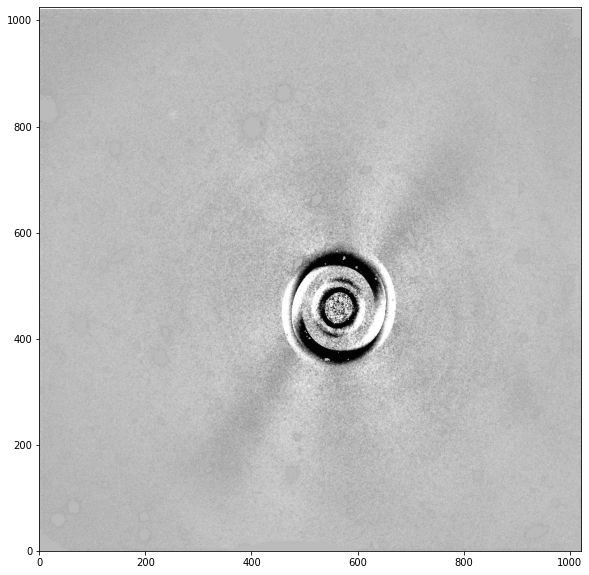

In [203]:
img = mpimg.imread('./resid.jpg')
x_max, y_max, _ = img.shape

plt.figure(figsize=(10,10))
plt.subplot(111)
ax = plt.gca()

ax.set_xlim([0, x_max])
ax.set_ylim([0, y_max])

imgplot = ax.imshow(img)

In [204]:
hdu_list = fits.open("jtemp.resid")
image_data = hdu_list[0].data
tt0 = image_data.reshape(-1)


std = np.std(tt0)
median = np.median(tt0)
mean = np.mean(tt0)
print(mean, median, std)


for i in range(10):
    tt = tt0[((tt0>median-3.5*std)&(tt0<median+3.5*std))]
    std = np.std(tt)
    median = np.median(tt)
    mean = np.mean(tt)
    print(mean, median, std, np.max(tt) - np.min(tt))




50.42912 8.403564 629.6609
14.895791 7.470459 212.91875 4407.3125
14.278493 7.3729706 143.5281 1490.2109
14.057642 7.298279 133.65715 1004.66797
13.958345 7.261017 131.57738 935.5144
13.9408455 7.2543945 131.11758 920.9922
13.937848 7.253784 130.9971 917.82214
13.939082 7.2539062 130.96062 916.93115
13.941449 7.2543335 130.94958 916.7031
13.941464 7.2543335 130.94812 916.6282
13.941464 7.2543335 130.94812 916.6282


In [138]:
## Monsta script
script = """

% sex jtemp.resid -c wfc3j.inpar
rd 1 wfc3j.obj
di 1 1
rd 2 './jtemp.resid'
mi 1 2 
cop 3 1
di 1 1 
wd 1 tmp.mask1 bitmap
tv 1 JPEG=tmp_mask.jpg
q


"""

with open('py_monsta.pro', 'w') as f:
    f.write(script)

cmd = monsta + ' py_monsta.pro '
xcmd(cmd + ' > py_monsta.log', verbose=False)

with open('py_monsta.log') as f:
    text = f.read()
    if "ERROR" in text.upper().split( ):
        print(text)

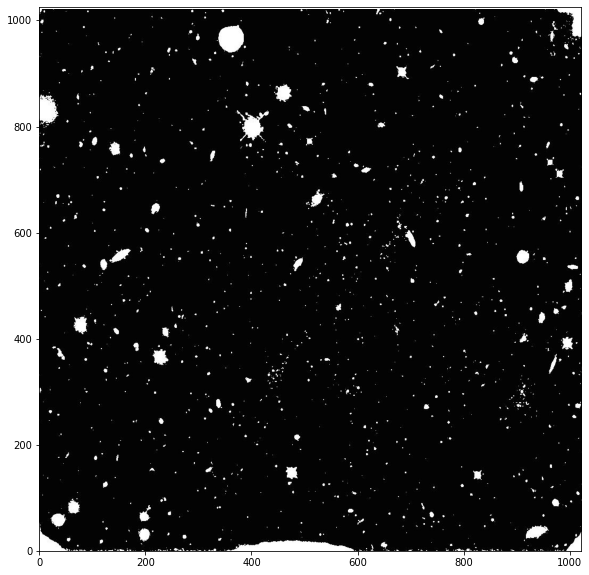

In [139]:
img = mpimg.imread('./tmp_mask.jpg')
x_max, y_max, _ = img.shape

plt.figure(figsize=(10,10))
plt.subplot(111)
ax = plt.gca()

ax.set_xlim([0, x_max])
ax.set_ylim([0, y_max])

imgplot = ax.imshow(img)

In [19]:
df = pd.read_csv("./py_elliprof.dat", delimiter=r"\s+", skiprows=7)

print(len(df))

df.tail(10)

30


,Rmaj,x0,y0,I0,alpha,ellip,I(3x),A(3x),I(4x),A(4x),slope
20,239.4,563.14,563.12,4134.7,163.50,0.160,0.0055,33.48,0.0659,57.51,-1.73
21,266.7,563.96,561.63,3415.8,161.69,0.164,0.0065,93.34,0.0747,59.24,-1.92
22,296.3,564.97,562.18,2732.5,161.08,0.175,0.0157,86.81,0.0852,55.86,-2.26
23,328.3,565.74,564.48,2134.6,158.72,0.168,0.0290,83.08,0.0802,58.61,-2.44
24,362.8,561.89,565.47,1678.1,158.72,0.165,0.0109,75.47,0.0494,55.71,-2.51
25,400.0,561.19,566.59,1303.5,160.14,0.173,0.0250,20.31,0.0509,50.05,-2.81
26,440.0,559.46,564.95,970.9,158.76,0.166,0.0049,57.08,0.0421,42.40,-3.10
27,482.9,558.39,563.12,737.4,158.64,0.158,0.0049,7.44,0.0495,43.32,-2.82
28,528.8,553.55,559.51,587.9,159.53,0.169,0.0154,105.50,0.0681,41.27,-2.64
29,578.0,537.07,553.50,458.6,155.32,0.148,0.0464,86.01,0.1123,55.49,-3.32


In [20]:
# plt.plot(df.Rmaj, (df["I0"]))

In [21]:
from astropy.io import fits
from astropy import wcs
from matplotlib import cm
from matplotlib.colors import LogNorm

hdu_list = fits.open('{}/{}j.fits'.format(name,name))
image_data = hdu_list[0].data
w = wcs.WCS(hdu_list[0].header)
x_max, y_max = image_data.shape

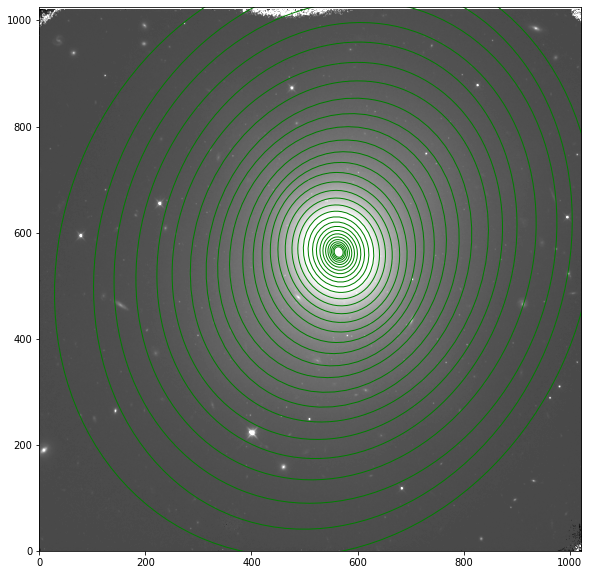

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(111)
ax = plt.gca()

image_data[(image_data<=0)] = 1.e-10
ax.imshow(np.sqrt(image_data), cmap='gray', vmin=0.001e3, vmax=0.2e3)
# plt.colorbar()

ax.set_xlim([0, x_max])
ax.set_ylim([0, y_max])

plt.gca().set_aspect(1.0)

for i in range(len(df)):
    plot_E(df.iloc[i], ax=ax, facecolor='none', linewidth=1, edgecolor='g')

In [23]:
df.head()

,Rmaj,x0,y0,I0,alpha,ellip,I(3x),A(3x),I(4x),A(4x),slope
0,10.0,564.45,563.33,695543.6,15.67,0.166,0.0017,20.08,0.0014,36.06,-0.85
1,12.7,564.44,563.35,538190.6,15.16,0.157,0.0004,1.25,0.0026,34.47,-1.16
2,15.8,564.45,563.34,409813.2,15.47,0.157,0.0003,28.43,0.0024,38.05,-1.25
3,19.5,564.46,563.31,315377.3,15.81,0.162,0.0019,26.68,0.0033,29.96,-1.27
4,23.8,564.48,563.29,245011.6,15.72,0.162,0.0019,62.81,0.0037,45.14,-1.35


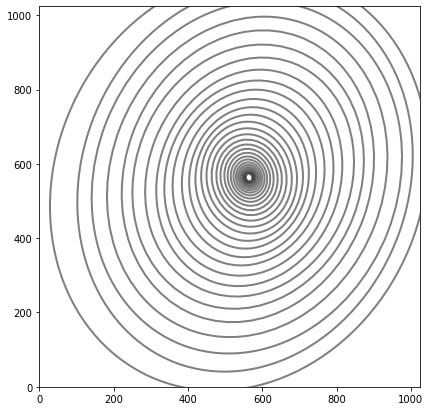

In [24]:
plt.figure(figsize=(7,7))
plt.subplot(111)
ax = plt.gca()

plt.xlim([0, 1024])
plt.ylim([0, 1024])
plt.gca().set_aspect(1.0)

for i in range(len(df)):
    plot_E(df.iloc[i], ax=ax, alpha=0.5, linewidth=2, edgecolor='k', facecolor='none')